In [294]:
import pandas as pd
df=pd.read_csv('/Users/inan/Desktop/cancer_data_for_inan.csv')

In [295]:
df.head(10)

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0
5,6,12.0,1022,1,74,1,1.0,50.0,80.0,513.0,0.0
6,7,7.0,310,2,68,2,2.0,70.0,60.0,384.0,10.0
7,8,11.0,361,2,71,2,2.0,60.0,80.0,538.0,1.0
8,9,1.0,218,2,53,1,1.0,70.0,80.0,825.0,16.0
9,10,7.0,166,2,61,1,2.0,70.0,70.0,271.0,34.0


In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  228 non-null    int64  
 1   inst        227 non-null    float64
 2   time        228 non-null    int64  
 3   status      228 non-null    int64  
 4   age         228 non-null    int64  
 5   sex         228 non-null    int64  
 6   ph.ecog     227 non-null    float64
 7   ph.karno    227 non-null    float64
 8   pat.karno   225 non-null    float64
 9   meal.cal    181 non-null    float64
 10  wt.loss     214 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 19.7 KB


#df=df.drop('Unnamed: 0',axis=1)


In [291]:
df.describe()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
count,228.00000,227.000000,228.000000,228.000000,228.000000,228.000000,227.000000,227.000000,225.000000,181.000000,214.000000
mean,114.50000,11.088106,305.232456,1.723684,62.447368,1.394737,0.951542,81.938326,79.955556,928.779006,9.831776
std,65.96211,8.303491,210.645543,0.448159,9.073457,0.489870,0.717872,12.327955,14.623177,402.174707,13.139902
min,1.00000,1.000000,5.000000,1.000000,39.000000,1.000000,0.000000,50.000000,30.000000,96.000000,-24.000000
25%,57.75000,3.000000,166.750000,1.000000,56.000000,1.000000,0.000000,75.000000,70.000000,635.000000,0.000000
50%,114.50000,11.000000,255.500000,2.000000,63.000000,1.000000,1.000000,80.000000,80.000000,975.000000,7.000000
75%,171.25000,16.000000,396.500000,2.000000,69.000000,2.000000,1.000000,90.000000,90.000000,1150.000000,15.750000
max,228.00000,33.000000,1022.000000,2.000000,82.000000,2.000000,3.000000,100.000000,100.000000,2600.000000,68.000000


```Inst,time,age,meal,wt.loss are continious variables.
Status,sex,ph.ecog,ph.karno,pat.karno categorical variables
```

In [233]:
df['status'].value_counts()

2    165
1     63
Name: status, dtype: int64

``` Dataset has higher number of Censored observation
```

In [235]:
df['ph.ecog'].value_counts()

1.0    113
0.0     63
2.0     50
3.0      1
Name: ph.ecog, dtype: int64

In [238]:
df['sex'].replace(2, 'Female',inplace=True)
df['sex'].replace(1, 'Male',inplace=True) 

df['status'].replace(2, 'dead',inplace=True)
df['status'].replace(1, 'cencored',inplace=True) 

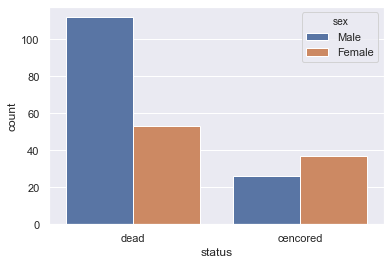

In [266]:
_=sns.countplot(x='status',hue='sex', data=df)

``` In the dataset, dead numbers higher among male observations than female. Censored numbers slightly higher among female group than male 
```

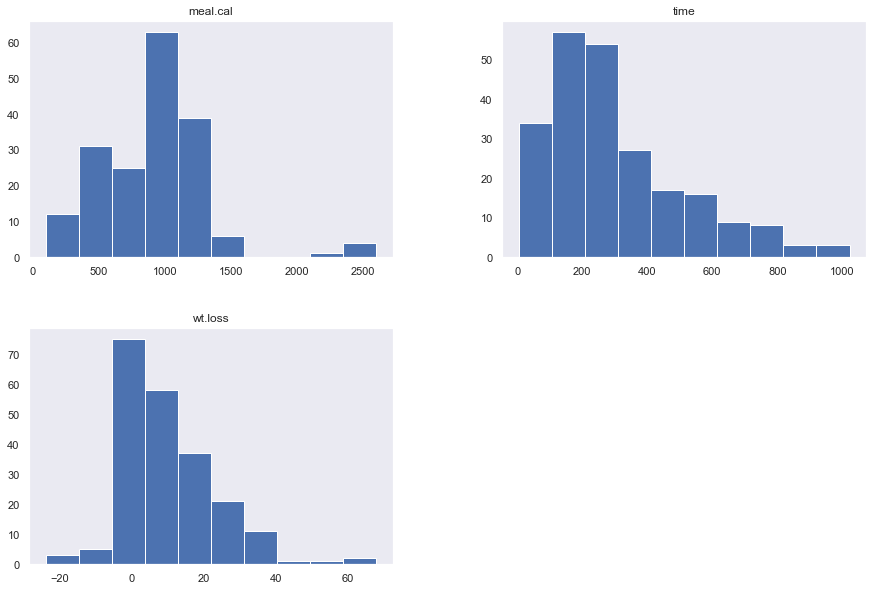

In [186]:
_=df[['meal.cal','wt.loss','time']].hist(bins=10,figsize=(15, 10),grid=False,)

```Time and wt.loss data is skewed to the right. Daily meal calories mostly between 500-1250
```

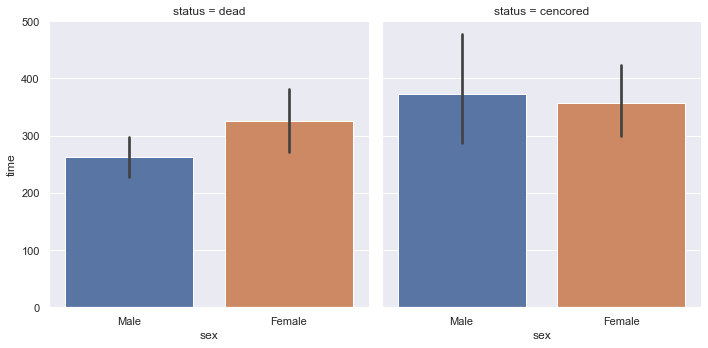

In [241]:
_=sns.catplot(x='sex',y='time',col='status',data=df,kind='bar')

```In Dead group, average survival time among women higher than male 
In cencored group, average survival time among those group slightly similar (men tend to live longer)
```

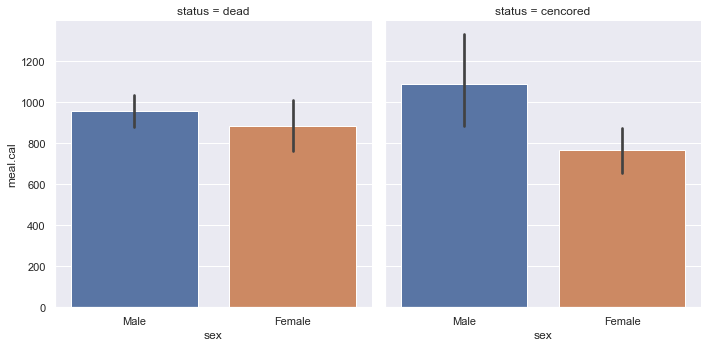

In [239]:
_=sns.catplot(x='sex',y='meal.cal',col='status',data=df,kind='bar')

```In Censored group,Men has higher average calories consumed at meals  than Women
```

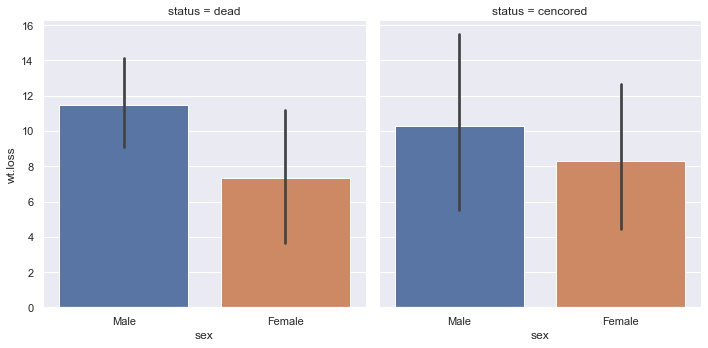

In [240]:
_=sns.catplot(x='sex',y='wt.loss',col='status',data=df,kind='bar')

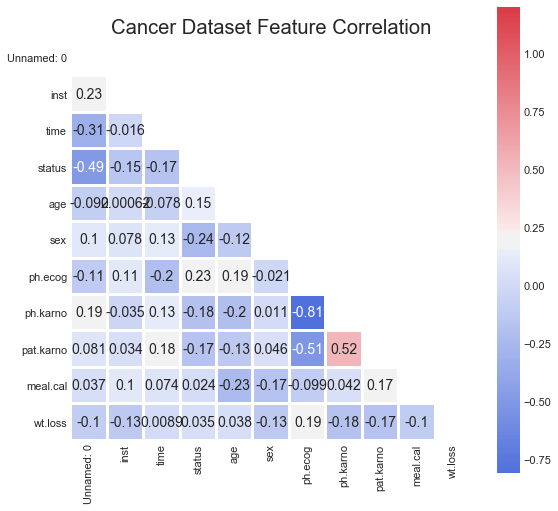

In [296]:
import numpy as np
plt.style.use('fivethirtyeight')
sns.set_style("white")
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
df, ax = plt.subplots(figsize=(8, 8))
plt.title('Cancer Dataset Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, 
            ax=ax,annot=True, fmt='.2g',linewidths=2)


```ph.ecog has a high negative correlation with ph.carno
```

```
import seaborn as sns
_=sns.pairplot(df.iloc[::,1:],corner=True)

```

In [14]:
from tableone import TableOne
import warnings
warnings.filterwarnings("ignore")

In [264]:
TableOne(df.iloc[::,2:],groupby='status',pval=True)

Grouped by status                                                     
                                      Missing        Overall       cencored           dead P-Value
n                                                        228             63            165        
time, mean (SD)                             0  305.2 (210.6)  363.5 (221.1)  283.0 (202.8)   0.014
age, mean (SD)                              0     62.4 (9.1)     60.3 (9.7)     63.3 (8.7)   0.033
sex, n (%)           Female                 0      90 (39.5)      37 (58.7)      53 (32.1)  <0.001
                     Male                         138 (60.5)      26 (41.3)     112 (67.9)        
ph.ecog, mean (SD)                          1      1.0 (0.7)      0.7 (0.6)      1.1 (0.7)  <0.001
ph.karno, mean (SD)                         1    81.9 (12.3)    85.6 (10.9)    80.5 (12.6)   0.004
pat.karno, mean (SD)                        3    80.0 (14.6)    84.0 (14.5)    78.4 (14.4)   0.011
meal.cal, mean (SD)                        47  928.8 (402.2)  912.8 (453.4)  934.4 (384.3)   0.771
wt.loss, mean (SD)                         14     9.8 (13.1)     9.1 (12.9)    10.1 (13.2)   0.607
[1] Hartigan's Dip Test reports possible
                                  multimodal distributions for: meal.cal, pat.karno, ph.ecog, ph.karno.
[2] Normality test reports non-normal
                                  distributions for: meal.cal, pat.karno, time, wt.loss.
[3] Tukey test indicates far outliers
                                  in: pat.karno.

df['meal.cal'] = df['meal.cal'].fillna(df.groupby('sex')['meal.cal'].transform('mean'))
